In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
income_tax_rate = np.array([0.05,0.1,0.2,0.23,0.33,0.40,0.45])
income_tax_deduction = np.array([0,97500,427500,636000,1536000,2796000,4796000])

In [3]:
@np.vectorize
def get_tax_rate_deduction(x):
    x = x // 1000 * 1000
    if 0 <= x <= 1949000:
        return income_tax_rate[0], income_tax_deduction[0]
    elif 1950000 <= x <= 3299000:
        return income_tax_rate[1], income_tax_deduction[1]
    elif 3300000 <= x <= 6949000:
        return income_tax_rate[2], income_tax_deduction[2]
    elif 6950000 <= x <= 8999000:
        return income_tax_rate[3], income_tax_deduction[3]
    elif 9000000 <= x <= 17999000:
        return income_tax_rate[4], income_tax_deduction[4]
    elif 18000000 <= x <= 39999000:
        return income_tax_rate[5], income_tax_deduction[5]
    elif 40000000 <= x:
         return income_tax_rate[6], income_tax_deduction[6]
    else:
        return ValueError("Invalid input.")


In [4]:
def calculate_income_tax(x):
    rate, deduction = get_tax_rate_deduction(x)
    return x * rate - deduction

In [5]:
x = np.array(range(0,50000001,1000))

In [6]:
tax = calculate_income_tax(x)

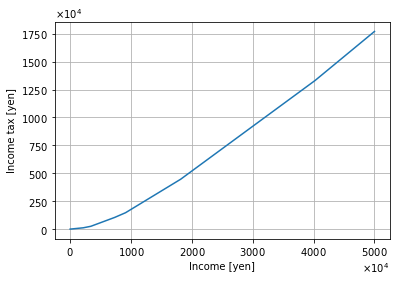

In [7]:
plt.plot(x, tax)
plt.xlabel("Income [yen]")
plt.ylabel("Income tax [yen]")
plt.ticklabel_format(useMathText=True, scilimits=(4,4))
plt.grid()
plt.show()

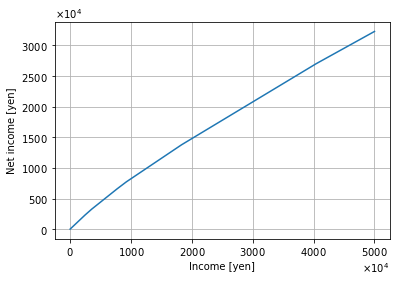

In [8]:
plt.plot(x,x - tax)
plt.xlabel("Income [yen]")
plt.ylabel("Net income [yen]")
plt.ticklabel_format(useMathText=True, scilimits=(4,4))
plt.grid()
plt.show()